In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())  # tf.tensor.numpy() returns the tensor as numpy nd array 

(32, 256, 256, 3)
[0 0 0 0 0 1 1 0 0 0 2 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 2 0 0 1 0 0]


In [5]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)
    print(label_batch.numpy())

(256, 256, 3)
[1 1 1 1 1 1 1 0 2 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 2 0 1 0 0 1]


In [7]:
print(dataset.class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [8]:
len(dataset)

68

In [9]:
for image_batch , label_batch in dataset.take(1):
    temp=image_batch[0].numpy()
   

In [10]:
temp

array([[[163., 157., 159.],
        [161., 155., 157.],
        [159., 153., 155.],
        ...,
        [167., 162., 168.],
        [163., 158., 164.],
        [160., 155., 161.]],

       [[163., 157., 159.],
        [161., 155., 157.],
        [159., 153., 155.],
        ...,
        [166., 161., 167.],
        [165., 160., 166.],
        [163., 158., 164.]],

       [[162., 156., 158.],
        [161., 155., 157.],
        [160., 154., 156.],
        ...,
        [165., 160., 166.],
        [166., 161., 167.],
        [166., 161., 167.]],

       ...,

       [[148., 138., 137.],
        [149., 139., 138.],
        [150., 140., 139.],
        ...,
        [183., 177., 181.],
        [182., 176., 180.],
        [172., 166., 170.]],

       [[144., 134., 133.],
        [147., 137., 136.],
        [151., 141., 140.],
        ...,
        [175., 169., 173.],
        [179., 173., 177.],
        [177., 171., 175.]],

       [[146., 136., 135.],
        [151., 141., 140.],
        [157., 1

In [11]:
temp= temp/255

(-0.5, 255.5, 255.5, -0.5)

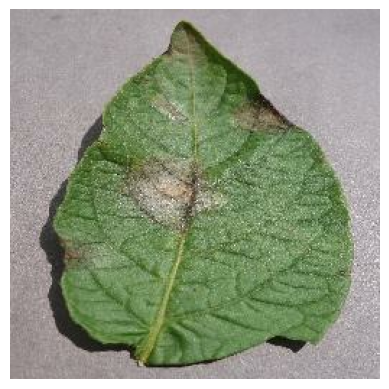

In [12]:
plt.imshow(temp)
plt.axis("off")

In [13]:
class_names= dataset.class_names

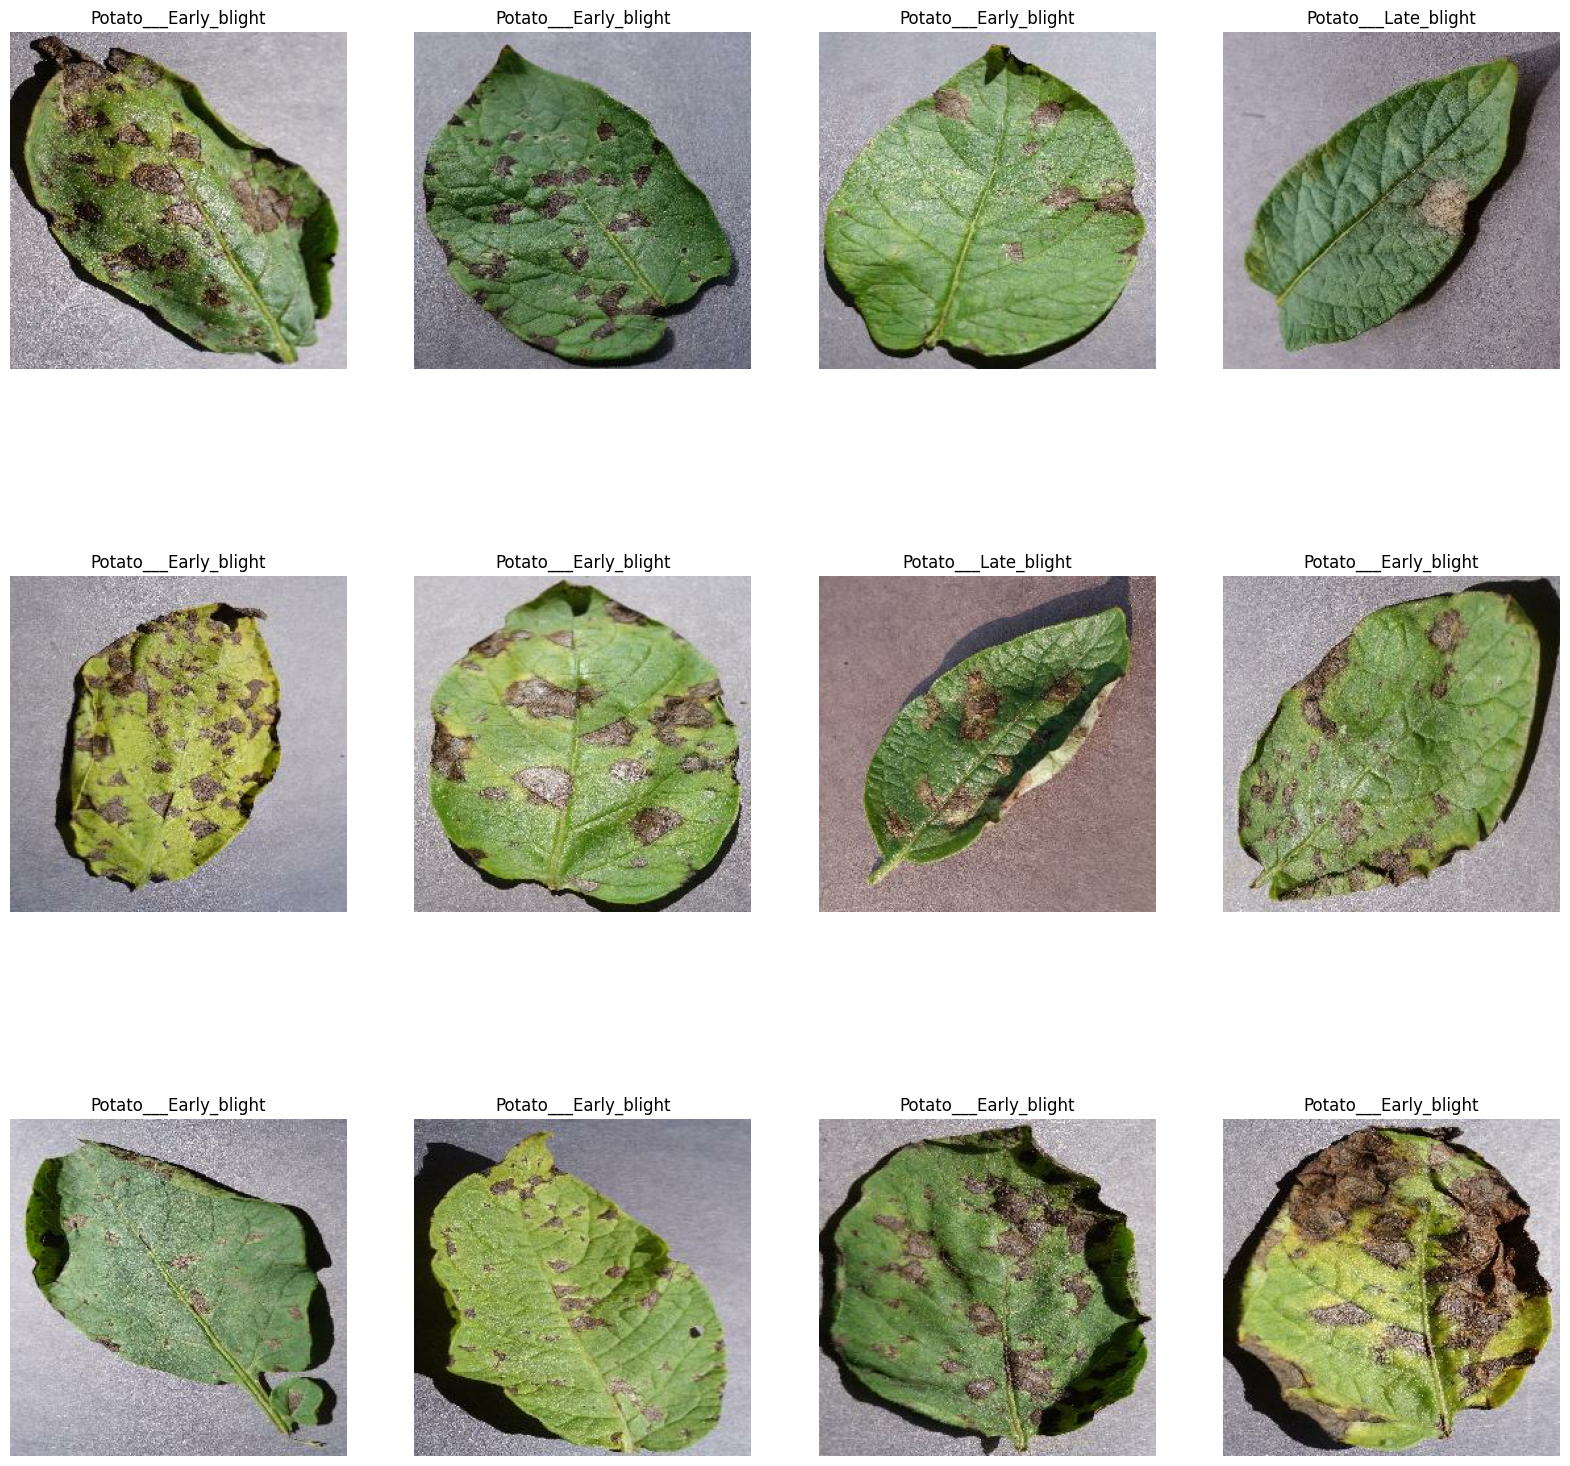

In [14]:
plt.figure(figsize=(20,20))
for image_batch , label_batch in dataset.take(1):
    for i in range (12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
   

In [15]:
##train test split

train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [16]:
train_ds = dataset.take(54)
len(train_ds)

54

In [17]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [21]:
def get_dataset_partitions_tf(ds, train_split = 0.8 , val_split= 0.1 , test_split=0.1, shuffle=True , shuffle_size = 10000 ):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12 )
    
    train_size= int(ds_size*train_split)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds ,test_ds 
    
    

In [22]:
train_ds , val_ds ,test_ds = get_dataset_partitions_tf(dataset)

In [23]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [27]:
CHANNELS=3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    epochs=25,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
54/54 [==============================] - 118s 2s/step - loss: 0.9005 - accuracy: 0.4826 - val_loss: 0.8349 - val_accuracy: 0.4948
Epoch 2/25
54/54 [==============================] - 96s 2s/step - loss: 0.7826 - accuracy: 0.6163 - val_loss: 0.5404 - val_accuracy: 0.7708
Epoch 3/25
54/54 [==============================] - 98s 2s/step - loss: 0.5049 - accuracy: 0.7882 - val_loss: 0.4080 - val_accuracy: 0.8542
Epoch 4/25
54/54 [==============================] - 97s 2s/step - loss: 0.3168 - accuracy: 0.8738 - val_loss: 0.2469 - val_accuracy: 0.9115
Epoch 5/25
54/54 [==============================] - 97s 2s/step - loss: 0.4110 - accuracy: 0.8438 - val_loss: 0.2877 - val_accuracy: 0.9010
Epoch 6/25
54/54 [==============================] - 100s 2s/step - loss: 0.2528 - accuracy: 0.9074 - val_loss: 0.2045 - val_accuracy: 0.9115
Epoch 7/25
54/54 [==============================] - 103s 2s/step - loss: 0.2153 - accuracy: 0.9184 - val_loss: 0.3375 - val_accuracy: 0.8854
Epoch 8/25
54/54 

In [31]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 435ms/step - loss: 0.0893 - accuracy: 0.9727


In [32]:
scores

[0.08926156163215637, 0.97265625]

In [33]:
history

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
len(history.history['accuracy'])

25

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

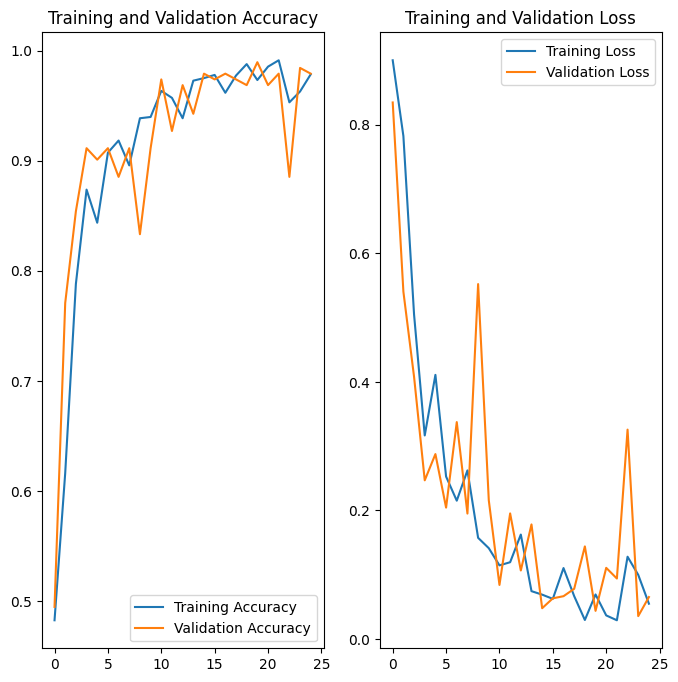

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(25),acc,label= 'Training Accuracy')
plt.plot(range(25),val_acc,label= 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(25),loss,label= 'Training Loss')
plt.plot(range(25),val_loss,label= 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

First image to predict 
actual lebel : Potato___Early_blight
Predicted lebel : Potato___Early_blight


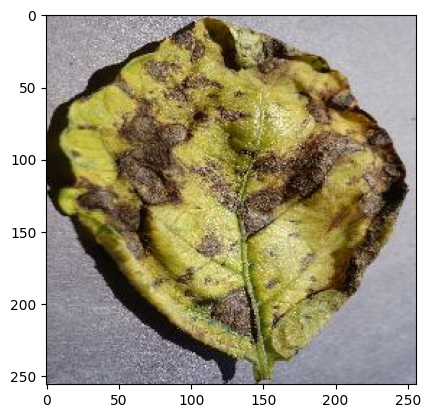

In [39]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_lebel = label_batch[0].numpy()
    
    print("First image to predict ")
    plt.imshow(first_image)
    
    print("actual lebel :" , class_names[first_lebel] )
    
    batch_prediction = model.predict(image_batch,verbose=0)
    print("Predicted lebel :" ,class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model , img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array,axis=0) # create a batch of 1 pic 
    
    predictions = model.predict(img_array,verbose=0)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

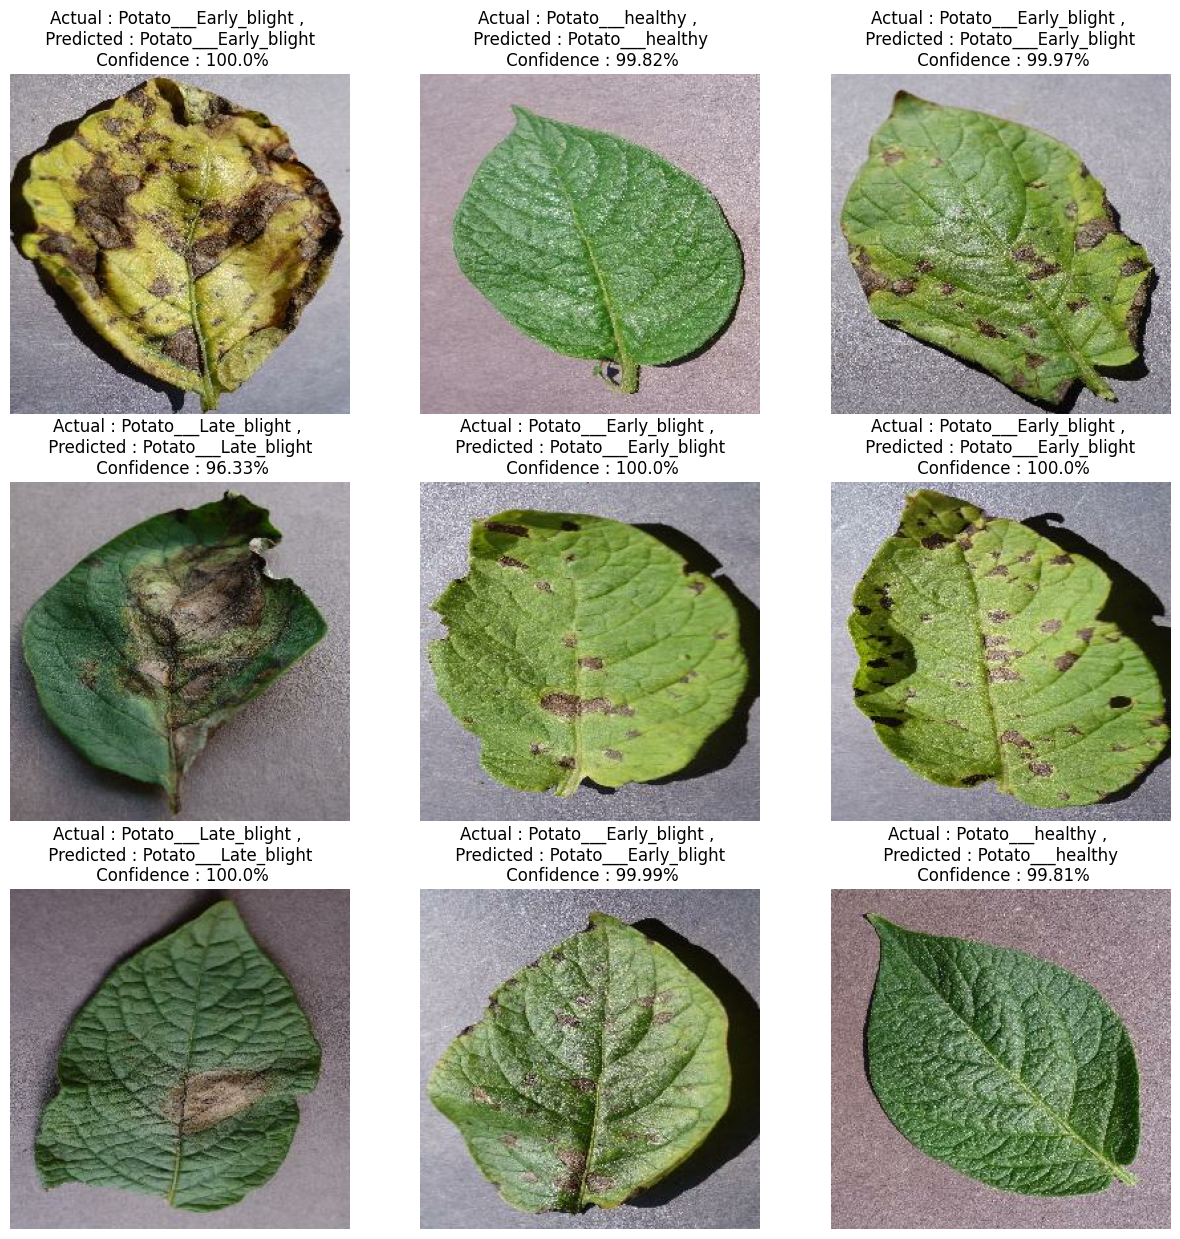

In [64]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class , confidence = predict(model , images[i])
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class} , \n Predicted : {predicted_class} \n Confidence : {confidence}%")
        plt.axis("off")

# Test with Random Picture


In [101]:
from matplotlib.image import imread

pic = imread("early-blight-of-potato.jpeg")
print(type(pic))

<class 'numpy.ndarray'>


In [102]:
pic

array([[[110, 114,  89],
        [102, 106,  83],
        [ 91,  94,  73],
        ...,
        [193, 192, 206],
        [194, 193, 207],
        [194, 193, 207]],

       [[107, 111,  86],
        [ 98, 102,  79],
        [ 87,  90,  71],
        ...,
        [193, 192, 206],
        [194, 193, 207],
        [194, 193, 207]],

       [[101, 105,  82],
        [ 92,  96,  73],
        [ 82,  83,  65],
        ...,
        [192, 191, 207],
        [192, 191, 207],
        [193, 192, 208]],

       ...,

       [[ 88, 138,  65],
        [ 88, 138,  65],
        [ 87, 137,  66],
        ...,
        [ 88,  87,  92],
        [ 90,  89,  94],
        [ 89,  88,  93]],

       [[ 85, 136,  61],
        [ 86, 137,  62],
        [ 86, 136,  63],
        ...,
        [ 89,  88,  93],
        [ 90,  89,  94],
        [ 89,  88,  93]],

       [[ 83, 134,  57],
        [ 84, 135,  58],
        [ 86, 137,  62],
        ...,
        [ 88,  87,  92],
        [ 89,  88,  93],
        [ 89,  88,  93]]

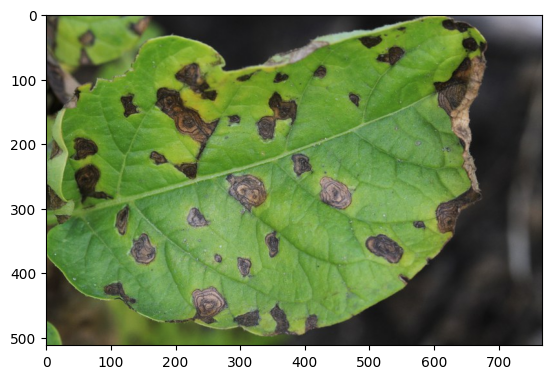

In [103]:
plt.imshow(pic)

In [104]:
pic1 = tf.expand_dims(pic, axis=0)

In [105]:
type(pic1)

tensorflow.python.framework.ops.EagerTensor

In [106]:
pic1.numpy().shape

(1, 512, 768, 3)

In [107]:
x =model.predict(pic1)

1/1 [==============================] - 0s 43ms/step


In [108]:
y = np.argmax(x)
print (y)

0


In [109]:
class_names[y]

'Potato___Early_blight'

enter the path : late_blight.jpg
Predicted by Model : Potato___Late_blight


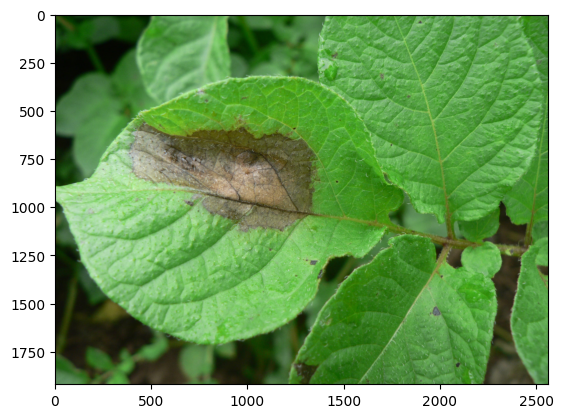

In [110]:
from matplotlib.image import imread
input_path = input("enter the path : ")
pic = imread(input_path)
plt.imshow(pic)
pic = tf.expand_dims(pic, axis=0)
predictions =model.predict(pic,verbose=0)
predicted_test_label = np.argmax(predictions)
print(f"Predicted by Model : {class_names[predicted_test_label]}")